In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [46]:
filepath = 'data/test/single.png'
b = 'data/test/break.png'
full = 'data/test/No_Titles.png'

In [54]:
img = cv2.imread(filepath,0)
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


In [55]:
br = cv2.imread(b,0)
# bgray = cv2.cvtColor(br,cv2.COLOR_BGR2GRAY)

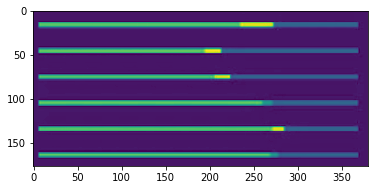

In [73]:
five = cv2.imread(full,0)
plt.imshow(five)
slice_size = round(five.shape[0]/5)
lib = []
for i in range(0,5):
    start = i * slice_size
    end = start + slice_size
    lib.append(five[start:end,:])

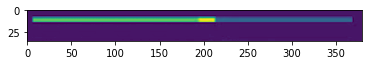

In [76]:
plt.imshow(lib[0])
plt.imshow(lib[1])


In [57]:
middle = round(gray.shape[0]/2)

In [58]:
X = gray[middle]

In [59]:
def color_classifier(segment):
    colors = {}
    values = ['border','base','boost','break','remain']
    for each in values:
        colors[each] = 0
        
    for each in segment:
        if each < 40:
            colors['border'] += 1
        elif each < 70:
            colors['remain'] += 1
        elif each < 105:
            colors['break'] += 1
        elif each < 145:
            colors['base'] += 1
        else:
            colors['boost'] += 1
    total = colors['base'] + colors['boost'] + colors['break'] + colors['remain']
    value = colors['base'] + colors['boost'] - colors['break']
    add = colors['boost']
    weak = colors['break']
    value_pct = round(value*100 / total,2)
    add_pct = round(add*100 / total,2)
    weak_pct = round(weak*100 / total,2)
    return value_pct, add_pct, weak_pct,colors
            

In [60]:
a = color_classifier(X)

In [61]:
a

(73.28,
 10.19,
 0.0,
 {'border': 11, 'base': 229, 'boost': 37, 'break': 0, 'remain': 97})

In [62]:
b = color_classifier(bgray[14])



In [63]:
b

(66.38,
 0.0,
 3.47,
 {'border': 18, 'base': 322, 'boost': 0, 'break': 16, 'remain': 123})